In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
with open("results/perlmutter/results.jsonl") as fp:
    lines = fp.readlines()
experiments = [json.loads(line) for line in lines]
results = pd.DataFrame.from_records(experiments)
results

,ntasks,cumulative_time,times,launch_time,end_time,method,module,nodes,sleep,setup
0,8192,177500.905469,"[14.049336500989739, 13.916665610973723, 13.91...",4.732335,111.207582,lazy,tensorflow,128,10,48.196896
1,8192,575077.143805,"[15.990970898012165, 16.890794524981175, 20.48...",3.429082,159.898227,file_system,tensorflow,128,10,0.001507
2,8192,83774.181634,"[13.920444472052623, 14.13611329800915, 14.305...",3.617374,346.823573,conda_pack,tensorflow,128,10,146.343000
3,8192,155656.349339,"[3.310727748030331, 3.317514814028982, 3.36743...",3.900753,88.420757,lazy,tensorflow,128,0,20.377964
4,8192,393894.858464,"[2.279979113023728, 2.2464728580089286, 2.2565...",3.946545,113.521125,file_system,tensorflow,128,0,0.001730
...,...,...,...,...,...,...,...,...,...,...
72,512,2045.050064,"[1.4909945870167576, 0.8525584639864974, 0.795...",0.225438,14.034737,lazy,numpy,64,0,1.944755
73,512,236.128649,"[0.09307974996045232, 0.07920595002360642, 0.1...",0.207012,8.005386,file_system,numpy,64,0,0.001501
74,512,14.230512,"[0.04592767101712525, 0.04660945100476965, 0.0...",0.218915,13.748428,conda_pack,numpy,64,0,56.800332
75,256,6968.837973,"[28.24182838498382, 21.473263462015893, 22.993...",0.127223,36.901631,lazy,tensorflow,64,10,19.656761


In [4]:
results["avg_time"] = results["times"].apply(lambda x: np.mean(x))
results["total_time"] = results["end_time"] + results["setup"]
results["tasks_per_node"] = results["ntasks"] / results["nodes"]
results.head()

,ntasks,cumulative_time,times,launch_time,end_time,method,module,nodes,sleep,setup,avg_time,total_time,tasks_per_node
0,8192,177500.905469,"[14.049336500989739, 13.916665610973723, 13.91...",4.732335,111.207582,lazy,tensorflow,128,10,48.196896,21.667591,159.404478,64.0
1,8192,575077.143805,"[15.990970898012165, 16.890794524981175, 20.48...",3.429082,159.898227,file_system,tensorflow,128,10,0.001507,70.199847,159.899734,64.0
2,8192,83774.181634,"[13.920444472052623, 14.13611329800915, 14.305...",3.617374,346.823573,conda_pack,tensorflow,128,10,146.343000,10.226341,493.166574,64.0
3,8192,155656.349339,"[3.310727748030331, 3.317514814028982, 3.36743...",3.900753,88.420757,lazy,tensorflow,128,0,20.377964,19.001019,108.798721,64.0
4,8192,393894.858464,"[2.279979113023728, 2.2464728580089286, 2.2565...",3.946545,113.521125,file_system,tensorflow,128,0,0.001730,48.082868,113.522854,64.0


In [5]:
def plot_time_vs_tasks(nodes=1, modules=["numpy", "tensorflow"], y="avg_time", sleep=10):
    for i, module in enumerate(modules):
        plt.subplot(1, len(modules), i+1)
        df = results[results["nodes"] == nodes]
        df = results[results["sleep"] == sleep]
        df = df[df["module"] == module]
        sns.barplot(data=df, x="ntasks", y=y, hue="method")
        plt.title(f"Module: {module}")
    plt.gcf().suptitle(f"{y} for nodes: {nodes}")

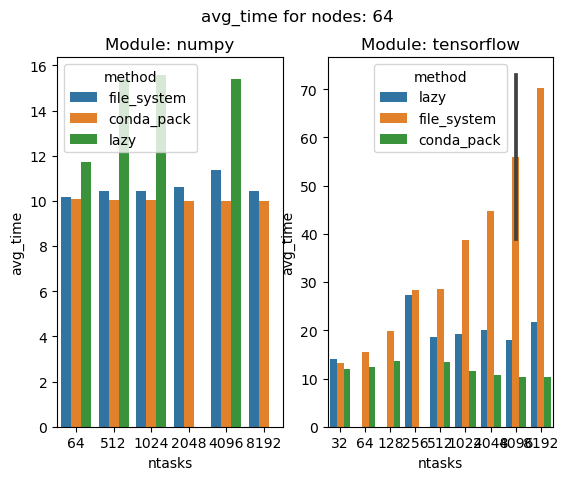

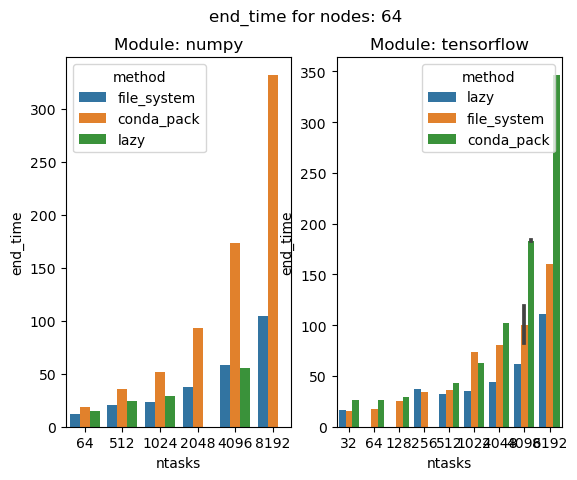

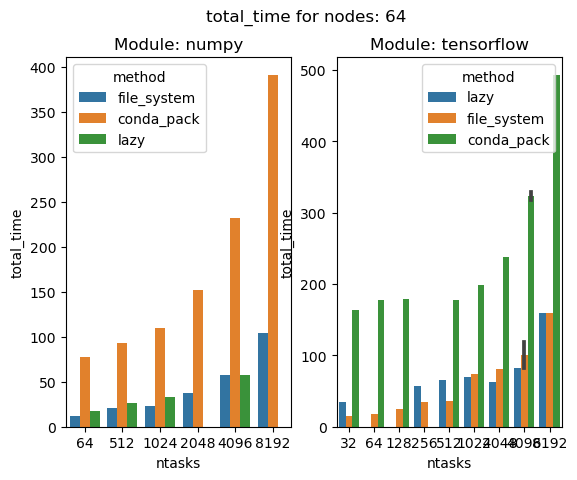

In [6]:
plot_time_vs_tasks(64)
plt.show()
plot_time_vs_tasks(64, y="end_time")
plt.show()
plot_time_vs_tasks(64, y="total_time")
plt.show()

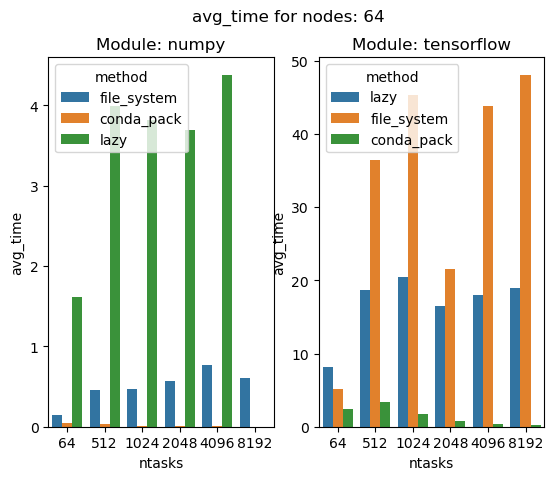

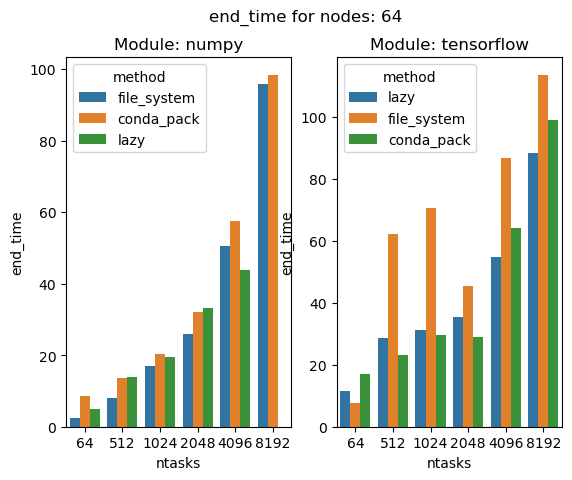

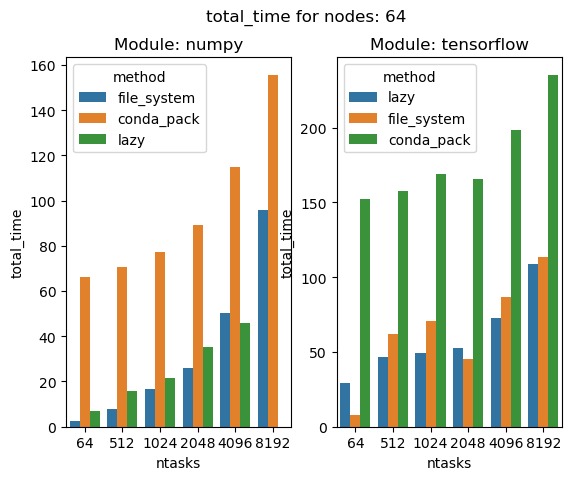

In [7]:
plot_time_vs_tasks(64, sleep=0)
plt.show()
plot_time_vs_tasks(64, y="end_time", sleep=0)
plt.show()
plot_time_vs_tasks(64, y="total_time", sleep=0)
plt.show()

In [2]:
with open("results/perlmutter/results-simulated.jsonl") as fp:
    lines = fp.readlines()
experiments = [json.loads(line) for line in lines]
results = pd.DataFrame.from_records(experiments)
results

,ntasks,cumulative_time,times,launch_time,end_time,method,module,nodes,sleep,setup,package_size
0,4096,2590.872712,"[0.09793414798332378, 0.5241081470157951, 0.10...",1.947926,53.949846,lazy,sim_pack,64,0,1.677259,1
1,4096,15791.716233,"[1.6229665809660219, 1.5962748129968531, 1.498...",2.000904,48.004431,file_system,sim_pack,64,0,0.001471,1
2,4096,13411.417200,"[1.9355399399937596, 1.978690504009137, 2.0278...",1.768655,60.686197,lazy,sim_pack,64,0,5.512988,3
3,4096,79027.639175,"[11.596516666002572, 11.550000698014628, 11.59...",1.731617,66.572963,file_system,sim_pack,64,0,0.001416,3
4,4096,611.931150,"[1.6155969399842434, 1.6191201219917275, 1.617...",1.758430,57.579358,conda_pack,sim_pack,64,0,78.760177,3
5,4096,20630.357789,"[0.34214787400560454, 0.3435316260147374, 0.35...",1.743197,56.020622,lazy,sim_pack,64,0,10.269810,6
6,4096,151345.785506,"[19.740995058004046, 19.662548886990407, 19.59...",1.797641,76.202780,file_system,sim_pack,64,0,0.001727,6
7,4096,1344.476893,"[4.416789002018049, 4.420643830002518, 4.41752...",1.861285,57.282606,conda_pack,sim_pack,64,0,79.793701,6
8,4096,31398.609281,"[0.25856026998371817, 0.30149046500446275, 0.2...",1.752799,51.248822,lazy,sim_pack,64,0,15.242306,9
9,4096,181543.594038,"[35.186836124019464, 35.200170031021116, 35.20...",1.779805,79.487624,file_system,sim_pack,64,0,0.001872,9


Text(0.5, 1.0, 'Simulated Package')

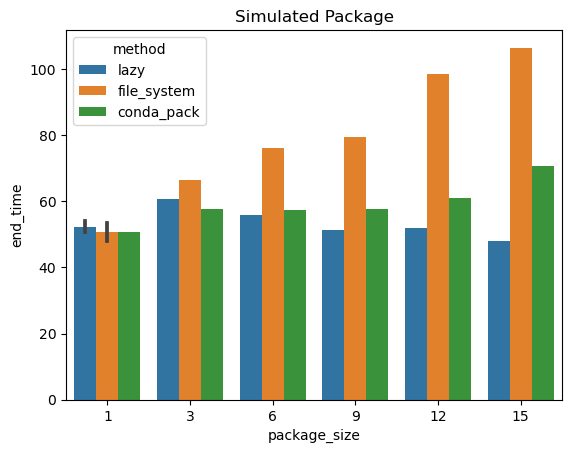

In [3]:
sns.barplot(data=results, x="package_size", y="end_time", hue="method")
plt.title(f"Simulated Package")

In [11]:
with open("results/perlmutter/xtb_results.jsonl") as fp:
    lines = fp.readlines()
experiments = [json.loads(line) for line in lines]
results = pd.DataFrame.from_records(experiments)
results

,method,nodes,initial,count,batch,time
0,lazy,64,4096,16384,4096,76.567775
1,file_system,64,4096,16384,4096,77.255843
2,lazy,64,4096,16384,4096,71.120564
3,file_system,64,4096,16384,4096,61.999371
4,lazy,64,4096,16384,4096,72.874247
5,file_system,64,4096,16384,4096,64.936000
6,lazy,64,4096,16384,4096,99.371140
7,file_system,64,4096,16384,4096,62.403770
8,lazy,64,4096,16384,4096,74.141615
9,file_system,64,4096,16384,4096,71.000000


Text(0.5, 1.0, 'XTB')

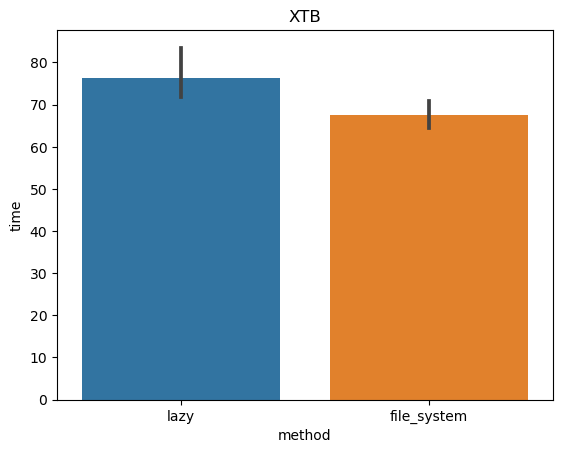

In [12]:
sns.barplot(data=results, x="method", y="time")
plt.title(f"XTB")
# plt.gcf().suptitle(f"{y} for nodes: {nodes}")

In [13]:
speedup = results[results["method"] == "file_system"]["time"].mean() / results[results["method"] == "lazy"]["time"].mean() 
print("Overall Speedup: ", speedup)

Overall Speedup:  0.8829595735741934
